In [1]:
import time
from collections import defaultdict

import numpy as np
import pandas as pd

In [2]:


class RBF_network(object):
    
    def __init__(self,gamma=0.1):
        self.gamma = gamma
        
    def train(self, X, y, centers = [], num_centers = 10, lamb = 0, gamma = None):
        print("Start training...")
        start = time.clock()
        self.centers = self.kmeans(X,num_centers) if len(centers) == 0 else centers

        if gamma != None:
            self.gamma = gamma
        Z = np.array([[self.RBF(x,c) for c in self.centers] for x in X])
        self.beta = np.linalg.inv(Z.T.dot(Z)+np.identity(len(self.centers))*lamb).dot(Z.T).dot(y)
        self.mse = np.mean((Z.dot(self.beta)-y)**2)
        print('Mean squared error: %.4f , using %.4f seconds.'%(self.mse,time.clock()-start))
        
    def predict(self, X_test):
        Zt = np.array([[self.RBF(xt,c) for c in self.centers] for xt in X_test])
        return Zt.dot(self.beta)
    
    def RBF(self, x, c):
        return np.exp(-self.gamma*np.sum((x-c)**2))
    
    def kmeans(self, X, num_centers):
        start = time.clock()
        centers = X[np.random.choice(X.shape[0],num_centers,replace=False)]
        clusters = []
        while True:
            new_clusters = [] 
            for i in range(X.shape[0]):
                distances = [np.sum((X[i]-c)**2) for c in centers]
                new_clusters.append(distances.index(min(distances)))
            if new_clusters == clusters:
                break
            clusters = new_clusters

            collect = defaultdict(list)
            for ind,clus in enumerate(clusters):
                collect[clus].append(X[ind]) 
            for clus,values in collect.items():
                centers[clus] = np.mean(values,axis=0)
        self.clusters = clusters
        print('Finished finding centers. Using %.2f seconds.'%(time.clock()-start))
        return centers


In [3]:
model = RBF_network()
X, y = np.random.random((10000,2)), np.random.rand(10000)
model.train(X, y)

Start training...
Finished finding centers. Using 39.84 seconds.
Mean squared error: 0.0830 , using 40.4270 seconds.


In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt

/Users/aaronlai/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


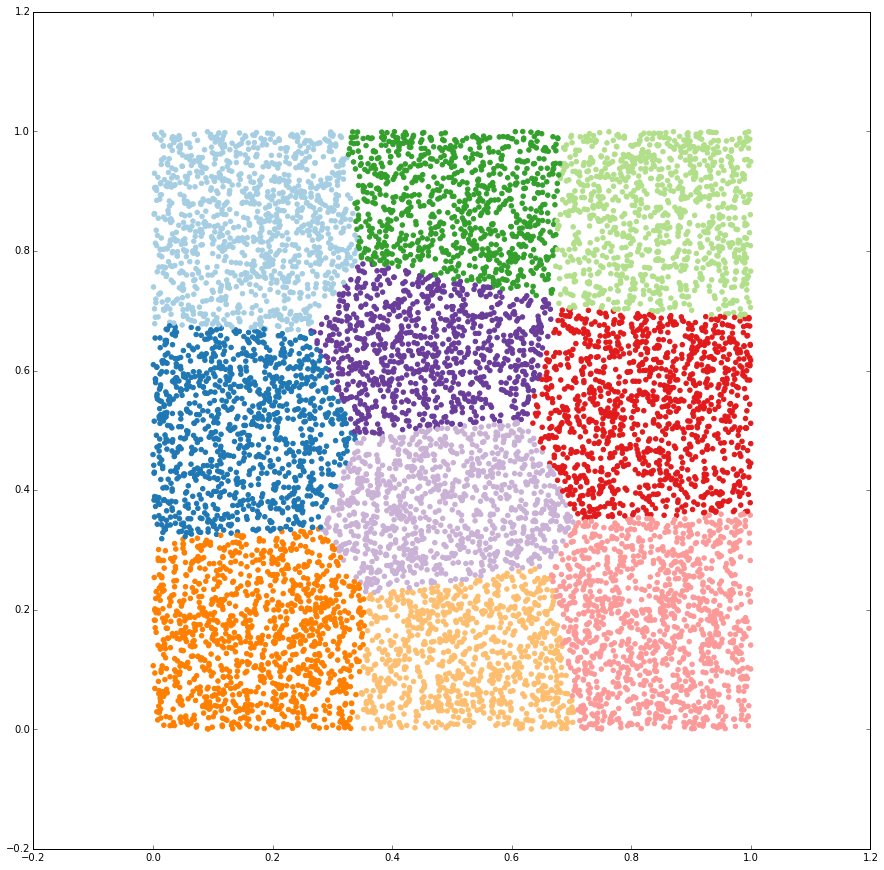

In [5]:
plt.figure(figsize=(15,15))
colors = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
                   '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'])

plt.scatter(X[:,0],X[:,1],color=colors[model.clusters])